<a href="https://colab.research.google.com/github/Sang565/Parking_Prediction_using_DNN_model/blob/main/Parking_Prediction_using_DNN_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parking_Prediction_using_DNN_model


# Import Libraries

In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
                                                            
from tensorflow.python.keras.preprocessing.sequence import TimeseriesGenerator  #must use this one for training with TimeSeriesGenerator 
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers

# Read input dataset


In [ ]:
# Read Data
df = pd.read_csv('https://archive.org/download/simulated-parking-datasets/dataset-20200501_20200731.csv')

df.head()

,LastUpdated,SystemCodeNumber,Occupancy
0,2020-05-01T00:00:15.000+12:00,1,102
1,2020-05-01T00:00:15.000+12:00,2,188
2,2020-05-01T00:01:15.000+12:00,1,108
3,2020-05-01T00:01:15.000+12:00,2,165
4,2020-05-01T00:02:15.000+12:00,1,106


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243104 entries, 0 to 243103
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   LastUpdated       243104 non-null  object
 1   SystemCodeNumber  243104 non-null  int64 
 2   Occupancy         243104 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 5.6+ MB


In [ ]:
df.shape

(243104, 3)

Convert date format from object type to datetime64 type to apply training and prediction

In [ ]:
# filter to eliminate one timezone (which has less data) for to_datetime() funtion use
#df[df['LastUpdated'].str.contains('+12:00', regex=False)]

In [ ]:
#add column 'date' by converting column 'LastUpdated' into datetime64 format
df['date'] = pd.to_datetime(df['LastUpdated'], infer_datetime_format=True) 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243104 entries, 0 to 243103
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype                                
---  ------            --------------   -----                                
 0   LastUpdated       243104 non-null  object                               
 1   SystemCodeNumber  243104 non-null  int64                                
 2   Occupancy         243104 non-null  int64                                
 3   date              243104 non-null  datetime64[ns, pytz.FixedOffset(720)]
dtypes: datetime64[ns, pytz.FixedOffset(720)](1), int64(2), object(1)
memory usage: 7.4+ MB


**------------ Select a specific CP to do prediction ----------**

In [ ]:
#df.SystemCodeNumber.head()

In [ ]:
# convert CP_ID column from Int to String
df['SystemCodeNumber'] = df['SystemCodeNumber'].apply(str)   # https://datatofish.com/integers-to-strings-dataframe/

In [ ]:
# Select the target CP --> 2 CPs: 1 and 2 
df_cp_filtered = df[df['SystemCodeNumber'].str.match('1')]

df_cp_filtered

,LastUpdated,SystemCodeNumber,Occupancy,date
0,2020-05-01T00:00:15.000+12:00,1,102,2020-05-01 00:00:15+12:00
2,2020-05-01T00:01:15.000+12:00,1,108,2020-05-01 00:01:15+12:00
4,2020-05-01T00:02:15.000+12:00,1,106,2020-05-01 00:02:15+12:00
6,2020-05-01T00:03:15.000+12:00,1,93,2020-05-01 00:03:15+12:00
8,2020-05-01T00:04:15.000+12:00,1,117,2020-05-01 00:04:15+12:00
...,...,...,...,...
243099,2020-07-31T23:55:15.000+12:00,1,101,2020-07-31 23:55:15+12:00
243100,2020-07-31T23:56:15.000+12:00,1,101,2020-07-31 23:56:15+12:00
243101,2020-07-31T23:57:15.000+12:00,1,111,2020-07-31 23:57:15+12:00
243102,2020-07-31T23:58:15.000+12:00,1,100,2020-07-31 23:58:15+12:00


In [ ]:
df_cp_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132426 entries, 0 to 243103
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype                                
---  ------            --------------   -----                                
 0   LastUpdated       132426 non-null  object                               
 1   SystemCodeNumber  132426 non-null  object                               
 2   Occupancy         132426 non-null  int64                                
 3   date              132426 non-null  datetime64[ns, pytz.FixedOffset(720)]
dtypes: datetime64[ns, pytz.FixedOffset(720)](1), int64(1), object(2)
memory usage: 5.1+ MB


Set index column and select features

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f705ac009e8>],
      dtype=object)

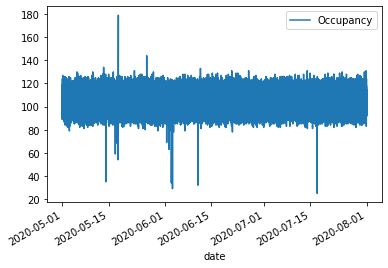

In [ ]:
# Set index (use date column) and select features and do plotting for viewing
df_cp_filtered.set_index('date') [['Occupancy']].plot(subplots=True)  # 2 steps: select column works as index,  and plot selected column (not the index column)


In [ ]:
# Select final input feature ('Occupany')
df_input = df_cp_filtered[['Occupancy']]  # df_input also use 'date' for index, inherited from df
df_input.head()

,Occupancy
0,102
2,108
4,106
6,93
8,117


In [ ]:
df_input.shape

(132426, 1)

In [ ]:
# re-checking trainning dataset quality
#df_input.query('Occupancy < 80')  

In [ ]:
df_input.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132426 entries, 0 to 243103
Data columns (total 1 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   Occupancy  132426 non-null  int64
dtypes: int64(1)
memory usage: 2.0 MB


In [ ]:
df_input.describe()

,Occupancy
count,132426.000000
mean,104.930414
std,6.888116
min,25.000000
25%,101.000000
50%,105.000000
75%,109.000000
max,179.000000


# train and test datasets

In [ ]:
# Split into training Data and test Data
#train, test = train_test_split(df, test_size=0.2) 
train, test = train_test_split(df_input, test_size=0.2, random_state=123, shuffle=False) # SANG changed


In [ ]:
#train  # no line 1, since it is a CP2 record

In [ ]:
train.head()

,Occupancy
0,102
2,108
4,106
6,93
8,117


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105940 entries, 0 to 196767
Data columns (total 1 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   Occupancy  105940 non-null  int64
dtypes: int64(1)
memory usage: 1.6 MB


In [ ]:
train.shape

(105940, 1)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26486 entries, 196770 to 243103
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Occupancy  26486 non-null  int64
dtypes: int64(1)
memory usage: 413.8 KB


In [ ]:
test.head()

,Occupancy
196770,108
196772,104
196773,102
196775,98
196778,113


In [ ]:
test.shape

(26486, 1)

# Model definition and training

In [ ]:
# Create keras Model in Sequential Mode --> create a layer-by-layer Neural Network
#  ==> Input Layer -> Hidden Layer/s -> Output Layer 
model = keras.Sequential()

# Input layer
model.add(keras.layers.Input(shape=(1, ))) # 

# Add the first Hidden layer
model.add(keras.layers.Dense(units=128, activation='relu', input_shape=(1, )))

# Add the second Hidden layer
model.add(keras.layers.Dense(units=64, activation='relu'))
model.add(keras.layers.Dropout(0.2)) 

# Add the third Hidden layer
model.add(keras.layers.Dense(units=32, activation='relu'))
model.add(keras.layers.Dropout(0.2)) 

# Ouput Layer
model.add(keras.layers.Dense(units=1))

In [ ]:
model.layers

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               256       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 10,625
Trainable params: 10,625
Non-trainable params: 0
____________________________________________________

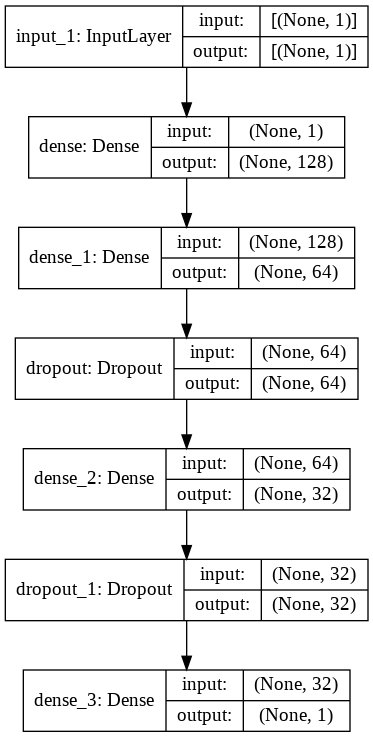

In [ ]:
# model ploting (model visualising)
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Comile the model 
model.compile(optimizer='adam', 
              loss='mean_squared_error', 
              metrics=['mean_absolute_error'])    

In [ ]:
#import datetime, os
#logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
#tensorboard_callback = keras.callbacks.TensorBoard(logdir, histogram_freq=1)

tb = tf.keras.callbacks.TensorBoard(log_dir='logs',histogram_freq=1) # SANG

In [ ]:
#early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)
early_stop = tf.keras.callbacks.EarlyStopping(monitor='mean_absolute_error', patience=50, mode='min')

#model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='weights.h5', monitor='mean_absolute_error', verbose=1, save_best_only=True, save_weights_only=True)  # USing
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='model.h5', monitor='mean_absolute_error', verbose=1, save_best_only=True)  # USing


In [ ]:
# Train the model on Data
batch_size = 128     # batch_size: Integer or None. Number of samples per gradient update. If unspecified, batch_size will default to 32.
#history = model.fit(train, train, epochs=1000, callbacks=[early_stop, tb, model_checkpoint])
history = model.fit(train, train, batch_size=batch_size, epochs=1000, callbacks=[early_stop, tb, model_checkpoint])

Epoch 1/1000
828/828 [==============================] - 2s 2ms/step - loss: 798.2778 - mean_absolute_error: 19.8478

Epoch 00001: mean_absolute_error improved from inf to 14.40198, saving model to model.h5
Epoch 2/1000
828/828 [==============================] - 1s 2ms/step - loss: 215.0683 - mean_absolute_error: 11.6297

Epoch 00002: mean_absolute_error improved from 14.40198 to 11.20918, saving model to model.h5
Epoch 3/1000
828/828 [==============================] - 2s 2ms/step - loss: 179.0612 - mean_absolute_error: 10.5433

Epoch 00003: mean_absolute_error improved from 11.20918 to 10.44439, saving model to model.h5
Epoch 4/1000
828/828 [==============================] - 2s 2ms/step - loss: 168.4737 - mean_absolute_error: 10.2323

Epoch 00004: mean_absolute_error improved from 10.44439 to 10.12375, saving model to model.h5
Epoch 5/1000
828/828 [==============================] - 2s 2ms/step - loss: 157.3350 - mean_absolute_error: 9.9146

Epoch 00005: mean_absolute_error improved fro

# Invoke TensorBoard

In [ ]:
# Load the TensorBoard notebook extension 
# https://stackoverflow.com/questions/55970686/tensorboard-not-found-as-magic-function-in-jupyter

%load_ext tensorboard

%tensorboard --logdir logs

# Model evaluation

In [ ]:
model.evaluate(train, train, verbose=1)

3311/3311 [==============================] - 3s 915us/step - loss: 1.3882 - mean_absolute_error: 0.8545


[1.3881856203079224, 0.8545196056365967]

# Model Prediction

In [ ]:
predictions = model.predict(test.values)

In [ ]:
predictions

array([[107.01834 ],
       [103.42011 ],
       [101.84004 ],
       ...,
       [109.461464],
       [100.004265],
       [103.42011 ]], dtype=float32)

In [ ]:
predictions.shape

(26486, 1)

In [ ]:
test.shape

(26486, 1)

In [ ]:
# create a df_final dataframe  
df_final = test

In [ ]:
df_final.columns = ['Occ_Actual']

In [ ]:
# Add one more column ('Occ_predicted')  to df_final 
df_final['Occ_Predicted'] = predictions

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_final.head()

,Occ_Actual,Occ_Predicted
196770,108,107.018341
196772,104,103.420113
196773,102,101.840042
196775,98,98.025551
196778,113,111.087288


Plotting

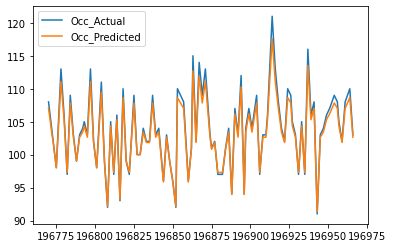

In [ ]:
#df_final[['Occ_Actual','Occ_Predicted']].plot()
df_final[['Occ_Actual','Occ_Predicted']][0:99].plot()